In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/logs/20250505_155033_TransformerClassifier.csv')

<Axes: xlabel='epoch', ylabel='avg_val_loss'>

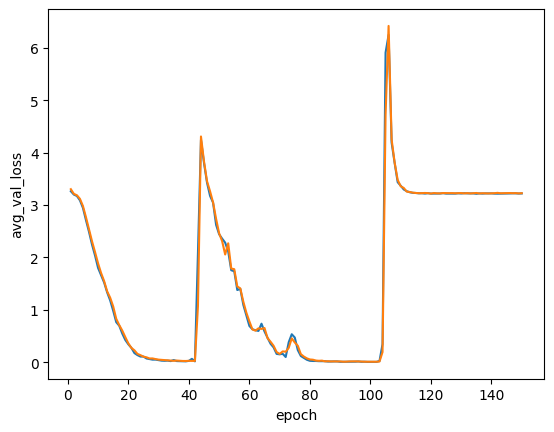

In [9]:
sns.lineplot(y='avg_val_loss', x='epoch', data=df)
sns.lineplot(y='avg_train_loss', x='epoch', data=df)

In [10]:
df.columns

Index(['epoch', 'avg_train_loss', 'avg_val_loss', 'fold0_train_loss',
       'fold0_val_loss', 'fold0_train_samples', 'fold0_val_samples',
       'fold0_train_groups', 'fold0_val_groups',
       'fold0_train_samples_per_group', 'fold0_val_samples_per_group',
       'fold1_train_loss', 'fold1_val_loss', 'fold1_train_samples',
       'fold1_val_samples', 'fold1_train_groups', 'fold1_val_groups',
       'fold1_train_samples_per_group', 'fold1_val_samples_per_group',
       'fold2_train_loss', 'fold2_val_loss', 'fold2_train_samples',
       'fold2_val_samples', 'fold2_train_groups', 'fold2_val_groups',
       'fold2_train_samples_per_group', 'fold2_val_samples_per_group',
       'fold3_train_loss', 'fold3_val_loss', 'fold3_train_samples',
       'fold3_val_samples', 'fold3_train_groups', 'fold3_val_groups',
       'fold3_train_samples_per_group', 'fold3_val_samples_per_group',
       'fold4_train_loss', 'fold4_val_loss', 'fold4_train_samples',
       'fold4_val_samples', 'fold4_train_group

<Axes: xlabel='epoch', ylabel='fold0_train_loss'>

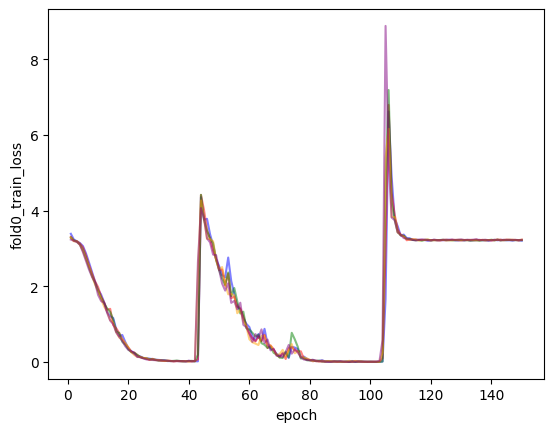

In [16]:
sns.lineplot(y='fold0_train_loss', x='epoch', data=df, color='blue', alpha=0.5)
sns.lineplot(y='fold1_train_loss', x='epoch', data=df, color='red', alpha=0.5)
sns.lineplot(y='fold2_train_loss', x='epoch', data=df, color='green', alpha=0.5)
sns.lineplot(y='fold3_train_loss', x='epoch', data=df, color='orange', alpha=0.5)
sns.lineplot(y='fold4_train_loss', x='epoch', data=df, color='purple', alpha=0.5)

<Axes: xlabel='epoch', ylabel='fold0_val_loss'>

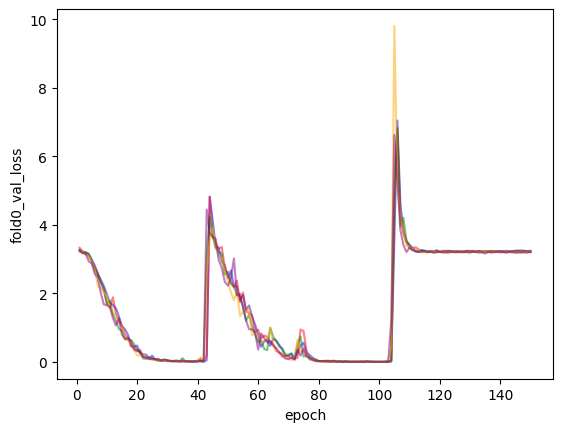

In [15]:
sns.lineplot(y='fold0_val_loss', x='epoch', data=df, color='blue', alpha=0.5)
sns.lineplot(y='fold1_val_loss', x='epoch', data=df, color='red', alpha=0.5)
sns.lineplot(y='fold2_val_loss', x='epoch', data=df, color='green', alpha=0.5)
sns.lineplot(y='fold3_val_loss', x='epoch', data=df, color='orange', alpha=0.5)
sns.lineplot(y='fold4_val_loss', x='epoch', data=df, color='purple', alpha=0.5)
